In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [461]:
df = pd.read_csv("Insurance claims data.csv")

In [462]:
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [464]:
df.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

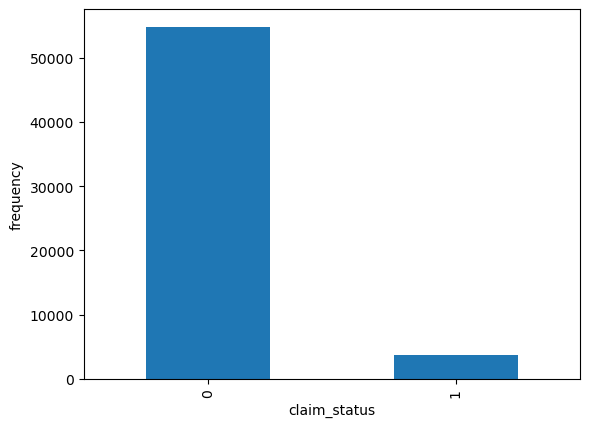

In [465]:
df['claim_status'].value_counts().plot(kind='bar')
plt.ylabel('frequency')
plt.show()

In [466]:
num_cols = ['subscription_length','vehicle_age','customer_age']

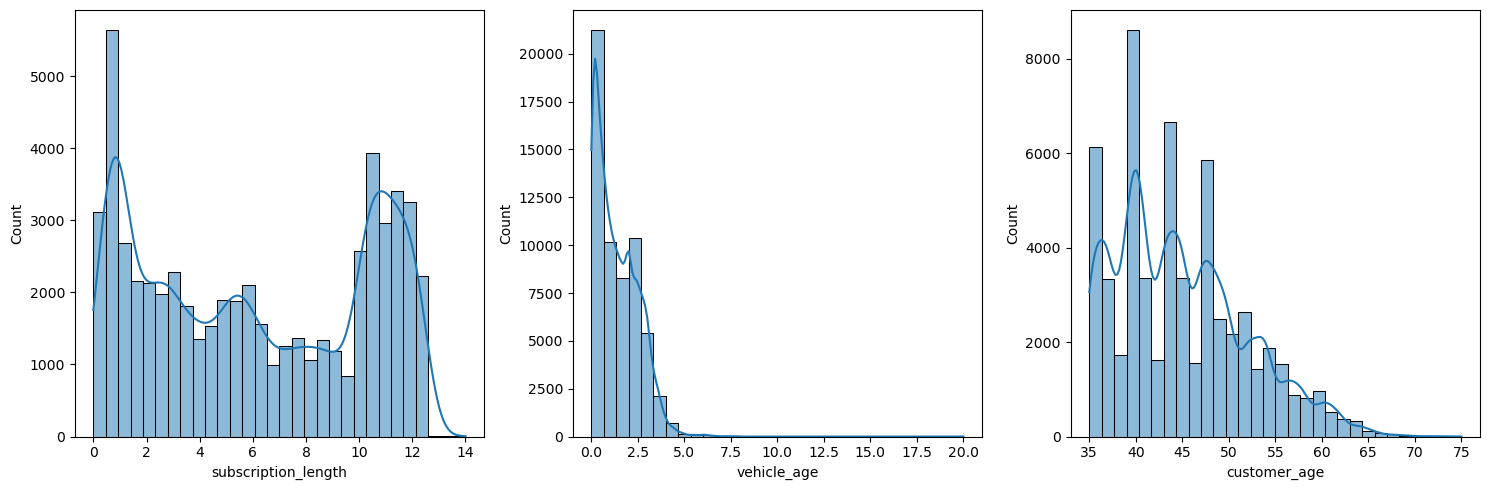

In [467]:
plt.figure(figsize=(15,5))

for i,column in enumerate(num_cols,1):
    plt.subplot(1,3,i)
    sns.histplot(data=df,x=column,bins=30,kde=True)
plt.tight_layout()
plt.show()

In [468]:
cat_cols=['region_code','segment','fuel_type']

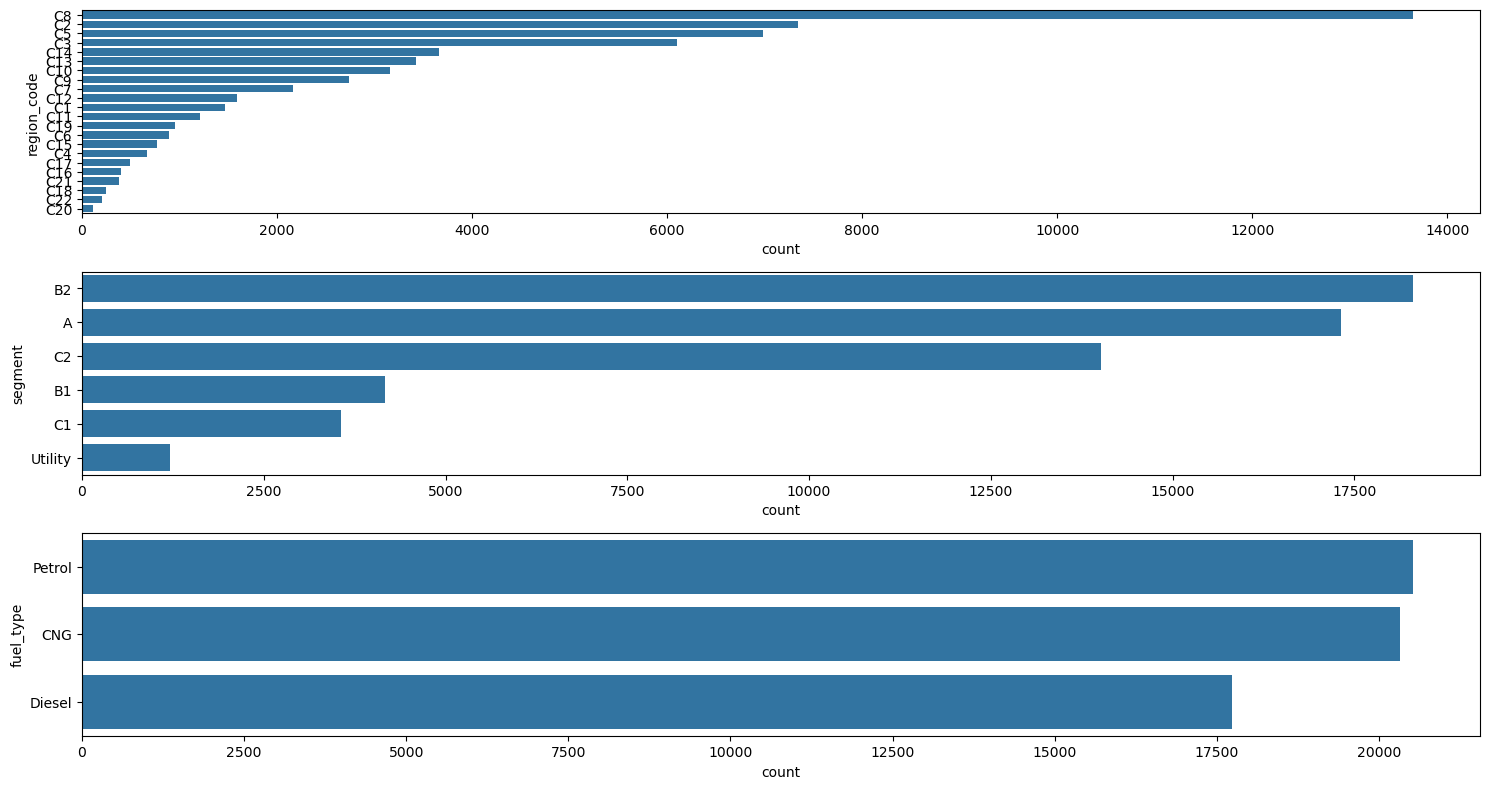

In [549]:
plt.figure(figsize=(15,8))


for i,column in enumerate(cat_cols,1):
    plt.subplot(3,1,i)
    sns.countplot(data=df,y=column,order=df[column].value_counts().index)
plt.tight_layout()
plt.show()

In [470]:
#handling imbalnced data

In [471]:
from sklearn.utils import resample

majority = df[df['claim_status']==0]
minority = df[df['claim_status']==1]

In [472]:
#oversampling the minority class
minority_oversampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                               random_state=42)
oversampled_data = pd.concat([majority,minority_oversampled])

#check distribution now
oversampled_dist = oversampled_data.claim_status.value_counts()

oversampled_dist

claim_status
0    54844
1    54844
Name: count, dtype: int64

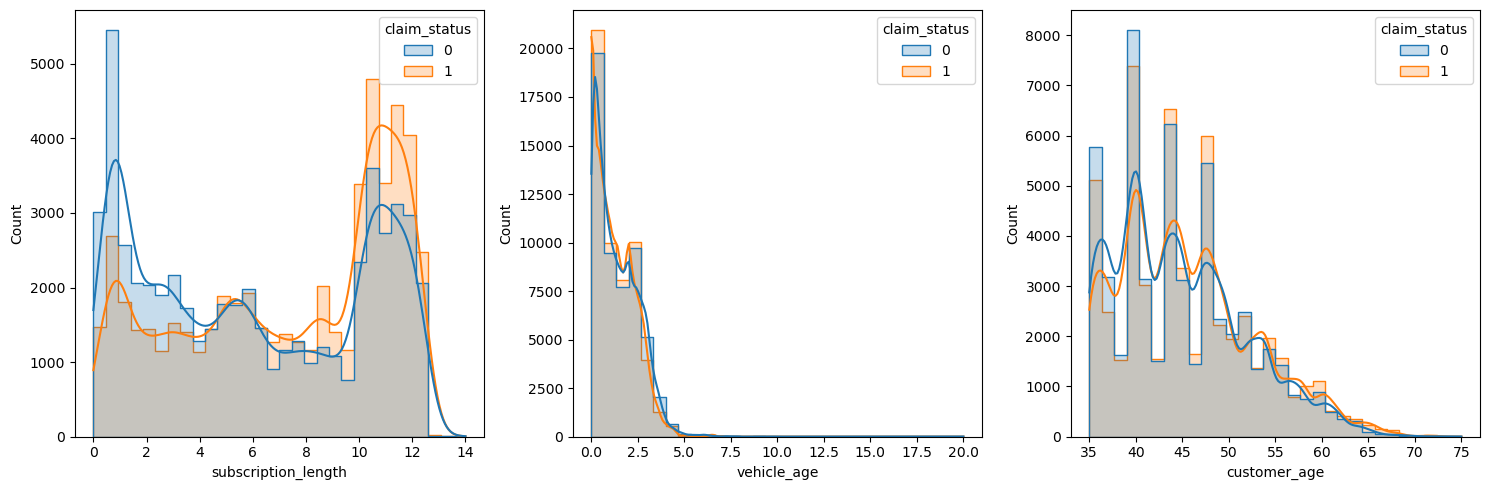

In [547]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(data=oversampled_data,x='subscription_length',hue='claim_status',kde=True,element='step',bins=30)

plt.subplot(1,3,2)
sns.histplot(data=oversampled_data,x='vehicle_age',hue='claim_status',kde=True,element='step',bins=30)

plt.subplot(1,3,3)
sns.histplot(data=oversampled_data,x='customer_age',hue='claim_status',kde=True,element='step',bins=30)

plt.tight_layout()
plt.show()

In [474]:
#feature selection

In [475]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
encoded_data = df.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

x = encoded_data.drop('claim_status',axis=1)
y = encoded_data['claim_status']

In [476]:
encoded_data.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,45359,9.3,1.2,41,20,8794,4,5,1,4,...,1,1,1,1,1,0,1,1,3,0
1,16744,8.2,1.8,35,11,27003,3,10,1,2,...,0,1,1,1,1,1,1,1,4,0
2,7193,9.5,0.2,44,20,8794,4,5,1,4,...,1,1,1,1,1,0,1,1,3,0
3,18145,5.2,0.4,44,1,73430,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
4,49010,10.1,1.0,56,4,5410,2,6,1,3,...,0,1,1,1,0,0,1,1,5,0


In [477]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x,y)
#find important featuers
feature_importance = rf_model.feature_importances_

feature_df = pd.DataFrame({'Features':x.columns,'Importance':feature_importance})
feature_df = feature_df.sort_values('Importance',ascending= False)
#get top 10 imp features
feature_df.head(10)

,Features,Importance
0,policy_id,0.321072
1,subscription_length,0.248309
3,customer_age,0.176639
2,vehicle_age,0.135190
5,region_density,0.053838
4,region_code,0.052649
7,model,0.000957
24,length,0.000846
26,gross_weight,0.000834
11,engine_type,0.000791


In [478]:
#so these are the imp featues

In [479]:
#building a model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

#policy_id is unique so drop it
oversampled_data = oversampled_data.drop('policy_id',axis=1)

x_oversampled = oversampled_data.drop('claim_status',axis=1)
y_oversampled = oversampled_data['claim_status']

In [558]:
x_oversampled_encoded = oversampled_data.apply(lambda col : LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

#split data into train and test

x_train,x_test,y_train,y_test = train_test_split(x_oversampled_encoded,y_oversampled,test_size=0.3,random_state=42)

rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(x_train,y_train)

y_pred = rf_model_oversampled.predict(x_test)
y_train_pred = rf_model_oversampled.predict(x_train)
print(classification_report(y_test,y_pred))
print("test acc",accuracy_score(y_test,y_pred))
print("trian acc",accuracy_score(y_train_pred,y_train))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16574
           1       1.00      1.00      1.00     16333

    accuracy                           1.00     32907
   macro avg       1.00      1.00      1.00     32907
weighted avg       1.00      1.00      1.00     32907

test acc 1.0
trian acc 1.0


In [528]:
classify_match = pd.DataFrame({'Acutal':y_test,'Predict':y_pred})

In [530]:
classify_match=classify_match.reset_index(drop=True)

In [532]:
classify_match.head()

,Acutal,Predict
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1


In [534]:
correctly_classified = (classify_match['Acutal'] == classify_match['Predict']).sum()
correctly_classified

32907

In [536]:
mis_classified = (classify_match['Acutal'] !=classify_match['Predict']).sum()
mis_classified

0

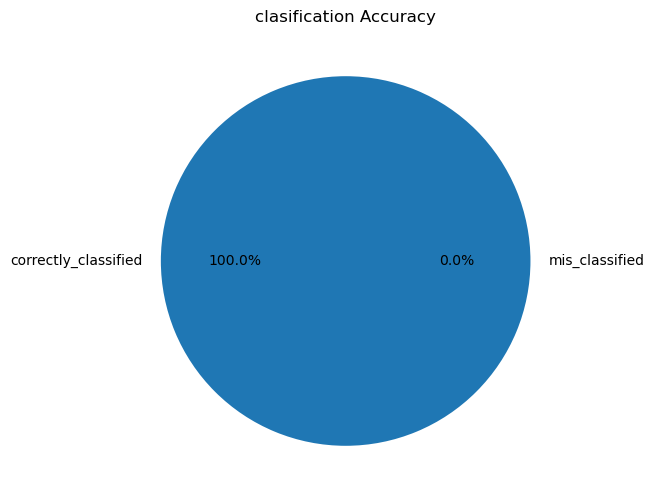

In [538]:
classification_count = [correctly_classified,mis_classified]
labels = ['correctly_classified','mis_classified']
plt.figure(figsize=(6,6))
plt.pie(classification_count,labels=labels,autopct="%1.1f%%")
plt.title("clasification Accuracy")
plt.show()

In [551]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample data (X: predictors, Y: target variables)
np.random.seed(0)
X = np.random.rand(100, 10)  # 100 samples, 10 features
Y = np.random.rand(100, 2)   # 100 samples, 2 target variables

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit the PLS Regression model
pls = PLSRegression(n_components=2)  # Reduce to 2 latent components
pls.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = pls.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

# Access the latent components
X_scores = pls.x_scores_
Y_scores = pls.y_scores_


Mean Squared Error: 0.09256511448109525
